# Home Sales Analysis

**Author:** Bridget Coleman
***

## Overview

There are many factors that can influence the price of a home.  Real estate professionals may have an idea of the best factors but are these current trends or are they 
out of date?  Based on recent home sales I will examine the features of these homes to see if there are current trends that effect the sales price.

## Business Problem

There are several factors and many places to get the information.

## Data Understanding

The data has been collected for home sales in King County, WA.  

In [140]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [2]:
df_RPSale = pd.read_csv("EXTR_RPSale.csv", dtype = str)
df_LookUp = pd.read_csv("EXTR_LookUp.csv", dtype = str)
df_Parcel = pd.read_csv("EXTR_Parcel.csv", dtype = str)
df_ResBldg = pd.read_csv("EXTR_ResBldg.csv", dtype = str)

In [3]:
df_RPSale.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2857854,198920,1430,03/28/2017,0,20170410000541,,,,,...,3,7,15,N,N,N,N,16,2,20 31
1,2743355,638580,0110,07/14/2015,190000,20150715002686,,,,,...,3,6,3,N,N,N,N,1,8,15
2,2999169,919715,0200,07/08/2019,192000,20190712001080,,,,,...,3,2,3,N,N,N,N,1,3,
3,2841697,894677,0240,12/21/2016,818161,20161228000896,,,,,...,2,6,3,N,N,N,N,1,8,
4,2826129,445872,0260,10/03/2016,0,20161004000511,,,,,...,3,2,15,N,N,N,N,18,3,18 31


In [4]:
df_RPSale.columns

Index(['ExciseTaxNbr', 'Major', 'Minor', 'DocumentDate', 'SalePrice',
       'RecordingNbr', 'Volume', 'Page', 'PlatNbr', 'PlatType', 'PlatLot',
       'PlatBlock', 'SellerName', 'BuyerName', 'PropertyType', 'PrincipalUse',
       'SaleInstrument', 'AFForestLand', 'AFCurrentUseLand', 'AFNonProfitUse',
       'AFHistoricProperty', 'SaleReason', 'PropertyClass', 'SaleWarning'],
      dtype='object')

In [5]:
df_RPSale.describe()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
count,351067,351067,351067,351067,351067,351067,351067,351067,351067,351067,...,351067,351067,351067,351067,351067,351067,351067,351067,351067,351067
unique,331698,15346,6076,1981,29381,306847,1,1,1,1,...,80,12,25,3,3,3,3,20,10,1917
top,2985982,276760,0020,12/08/2015,0,,,,,,...,3,6,3,N,N,N,N,1,8,
freq,197,1301,6898,513,107266,26368,351067,351067,351067,351067,...,197175,266390,223382,312653,312511,312984,313257,240120,245047,206136


In [6]:
df_LookUp.head()


,LUType,LUItem,LUDescription
0,1,1,LAND ONLY ...
1,1,10,Land with new building ...
2,1,11,"Household, single family units ..."
3,1,12,"Multiple family residence (Residential, 2-4 un..."
4,1,13,"Multiple family residence (Residential, 5+ uni..."


In [7]:
LookUp = df_LookUp.apply(pd.to_numeric, errors='ignore')

In [8]:
df_LookUp.describe()

,LUType,LUItem,LUDescription
count,1208,1208,1208
unique,73,405,1104
top,118,1,Other ...
freq,231,67,9


In [9]:
LookUp[LookUp.LUType==2]

,LUType,LUItem,LUDescription
804,2,1,AGRICULTURAL ...
805,2,10,OTHER ...
806,2,11,COMMERCIAL/INDUSTRIAL ...
807,2,2,CONDOMINIUM ...
808,2,3,RECREATIONAL ...
809,2,4,APT(4+ UNITS) ...
810,2,5,INDUSTRIAL ...
811,2,6,RESIDENTIAL ...
812,2,7,COMMERCIAL ...
813,2,8,MOBILE HOME ...


In [10]:
LookUp[LookUp.LUType==108]

,LUType,LUItem,LUDescription
243,108,1,Floor-Wall ...
244,108,2,Gravity ...
245,108,3,Radiant ...
246,108,4,Elec BB ...
247,108,5,Forced Air ...
248,108,6,Hot Water ...
249,108,7,Heat Pump ...
250,108,8,Other ...


In [11]:
LookUp[LookUp.LUType==84]

,LUType,LUItem,LUDescription
1169,84,1,Oil ...
1170,84,2,Gas ...
1171,84,3,Electricity ...
1172,84,4,Oil/Solar ...
1173,84,5,Gas/Solar ...
1174,84,6,Electricity/Solar ...
1175,84,7,Other ...


In [12]:
LookUp[LookUp.LUType==1].head(42)

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY ...
1,1,10,Land with new building ...
2,1,11,"Household, single family units ..."
3,1,12,"Multiple family residence (Residential, 2-4 un..."
4,1,13,"Multiple family residence (Residential, 5+ uni..."
5,1,14,Residential condominiums ...
6,1,15,Mobile home parks or courts ...
7,1,16,Hotels/motels ...
8,1,17,Institutional lodging ...
9,1,18,All other residential not elsewhere coded ...


In [13]:
LookUp[LookUp.LUType==1].tail(42)

,LUType,LUItem,LUDescription
42,1,52,"Retail trade-bldg materials, hardware, farm eq..."
43,1,53,Retail trade - general merchandise ...
44,1,54,Retail trade - food ...
45,1,55,"Retail trade-autom., marine craft, aircraft ..."
46,1,56,Retail trade - apparel and accessories ...
47,1,57,"Retail trade-furniture, home furnishings, equi..."
48,1,58,Retail trade-eating & drinking ...
49,1,59,"Tenant occupied, commercial properties ..."
50,1,6,BUILDING ONLY ...
51,1,61,"Finance, insurance, and real estate services ..."


In [14]:
df_Parcel.head()

,Unnamed: 0,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,0,807841,0410,,SUMMER RIDGE DIV NO. 02,41,,6,25,22,...,N,N,N,N,N,N,N,N,N,N
1,2,755080,0015,,SANDER'S TO GILMAN PK & SALMON BAY,3,1,3,25,11,...,N,N,N,N,N,N,N,N,N,N
2,3,888600,0135,,VASHON GARDENS ADD,21,,3,22,8,...,N,N,N,N,N,N,N,N,N,N
3,6,022603,9181,,NaN,,,3,26,2,...,N,N,N,N,N,N,N,N,N,N
4,7,229670,0160,,ELDORADO NORTH,16,,5,26,19,...,N,N,N,N,N,N,N,N,N,N


In [15]:
df_Parcel.columns

Index(['Unnamed: 0', 'Major', 'Minor', 'PropName', 'PlatName', 'PlatLot',
       'PlatBlock', 'Range', 'Township', 'Section', 'QuarterSection',
       'PropType', 'Area', 'SubArea', 'SpecArea', 'SpecSubArea',
       'DistrictName', 'LevyCode', 'CurrentZoning', 'HBUAsIfVacant',
       'HBUAsImproved', 'PresentUse', 'SqFtLot', 'WaterSystem', 'SewerSystem',
       'Access', 'Topography', 'StreetSurface', 'RestrictiveSzShape',
       'InadequateParking', 'PcntUnusable', 'Unbuildable', 'MtRainier',
       'Olympics', 'Cascades', 'Territorial', 'SeattleSkyline', 'PugetSound',
       'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView',
       'WfntLocation', 'WfntFootage', 'WfntBank', 'WfntPoorQuality',
       'WfntRestrictedAccess', 'WfntAccessRights', 'WfntProximityInfluence',
       'TidelandShoreland', 'LotDepthFactor', 'TrafficNoise', 'AirportNoise',
       'PowerLines', 'OtherNuisances', 'NbrBldgSites', 'Contamination',
       'DNRLease', 'AdjacentGolfFairway', 'Adjace

In [16]:
df_Parcel.describe()

,Unnamed: 0,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
count,205199,205199,205199,196088,176654,205199,205199,205199,205199,205199,...,205199,205199,205199,205199,205199,205199,205199,205199,205199,205199
unique,205199,12226,6060,10056,11028,4931,726,13,9,37,...,1,1,1,1,1,1,1,2,2,2
top,437406,276760,0020,,GILMAN PARK ADD BLKS 01 THRU 47,,,4,25,15,...,N,N,N,N,N,N,N,N,N,N
freq,1,902,3413,173802,902,29048,117498,74779,44381,7550,...,205199,205199,205199,205199,205199,205199,205199,203925,205148,204061


In [17]:
df_ResBldg.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,009800,0720,1,1,27719 SE 26TH WAY 98075,27719,,SE,26TH,WAY,...,0,0,0,2001,0,0,0,0,3,0
1,009802,0140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,0,0,0,2004,0,0,0,0,3,0
2,009830,0020,1,1,1715 298TH CRESENT SE,1715,,,298TH CRESENT,,...,0,0,0,2017,0,0,0,0,3,0
3,009830,0160,1,1,1861 297TH WAY SE 98024,1861,,,297TH,WAY,...,0,0,0,2013,0,0,0,0,3,0
4,010050,0180,1,1,35410 25TH PL S 98003,35410,,,25TH,PL,...,0,0,0,1994,0,0,0,0,4,0


In [18]:
df_ResBldg.describe()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
count,181510,181510,181510,181510,181510,181510,181510,181146,181510,181510,...,181510,181510,181510,181510,181510,181510,181510,181510,181510,181510
unique,11239,5720,21,5,178921,26978,43,9,2342,24,...,6,4,6,122,91,86,68,24,5,356
top,276760,0020,1,1,,,,,2ND,AVE,...,0,0,0,2018,0,0,0,0,3,0
freq,827,3120,179471,178370,364,430,175399,109152,1559,73219,...,130576,169571,150254,4803,173037,179959,180248,181418,118168,161520


In [19]:
df_ResBldg.columns

Index(['Major', 'Minor', 'BldgNbr', 'NbrLivingUnits', 'Address',
       'BuildingNumber', 'Fraction', 'DirectionPrefix', 'StreetName',
       'StreetType', 'DirectionSuffix', 'ZipCode', 'Stories', 'BldgGrade',
       'BldgGradeVar', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'FinBasementGrade',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'HeatSystem',
       'HeatSource', 'BrickStone', 'ViewUtilization', 'Bedrooms',
       'BathHalfCount', 'Bath3qtrCount', 'BathFullCount', 'FpSingleStory',
       'FpMultiStory', 'FpFreestanding', 'FpAdditional', 'YrBuilt',
       'YrRenovated', 'PcntComplete', 'Obsolescence', 'PcntNetCondition',
       'Condition', 'AddnlCost'],
      dtype='object')

In [20]:
sale_bldg = df_RPSale.merge(df_Parcel, on = ["Major", "Minor"]).merge(df_ResBldg, on = ["Major", "Minor"] )

In [21]:
cols = list(sale_bldg.columns)
cols = [cols[4]] + cols[:4] + cols[5:]
sale_bldg = sale_bldg[cols]

In [22]:
sale_bldg.head()

,SalePrice,ExciseTaxNbr,Major,Minor,DocumentDate,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,190000,2743355,638580,0110,07/14/2015,20150715002686,,,,,...,1,0,1,1963,0,0,0,0,3,0
1,0,2743356,638580,0110,07/14/2015,20150715002687,,,,,...,1,0,1,1963,0,0,0,0,3,0
2,338000,2772937,638580,0110,12/21/2015,20151222002066,,,,,...,1,0,1,1963,0,0,0,0,3,0
3,818161,2841697,894677,0240,12/21/2016,20161228000896,,,,,...,0,0,0,2016,0,0,0,0,3,0
4,0,3024468,894677,0240,12/05/2019,20191209000162,,,,,...,0,0,0,2016,0,0,0,0,3,0


In [23]:
all_columns = list(sale_bldg)
all_columns
print(len(all_columns))

152


In [24]:
sale_bldg = sale_bldg.apply(pd.to_numeric, errors='ignore')

Based on the Look Up table, I am selecting all of the single family homes, condos, etc.

In [25]:
sale_bldg=sale_bldg[(sale_bldg.PropertyType==11)|(sale_bldg.PropertyType==12)|(sale_bldg.PropertyType==13)|(sale_bldg.PropertyType==14)|(sale_bldg.PropertyType==18)]

Also using the Look Up table, I am selecting properties that are only residential.

In [26]:
sale_bldg = sale_bldg[sale_bldg.PrincipalUse==6]

In [27]:
new_cols = list(sale_bldg.columns)
cols_30 = new_cols[:31]
sale_bldg_30 = sale_bldg[cols_30]

In [28]:
cols_60 = [cols[0]] + cols[31:61]
sale_bldg_60 = sale_bldg[cols_60]

In [29]:
cols_90 = [cols[0]] + cols[61:91]
sale_bldg_90 = sale_bldg[cols_90]

In [30]:
cols_end = [cols[0]] + cols[91:]
sale_bldg_end = sale_bldg[cols_end]

In [31]:
corr_30 = sale_bldg_30.corr()

In [32]:
corr_60 = sale_bldg_60.corr()

In [33]:
corr_90 = sale_bldg_90.corr()

In [34]:
corr_end = sale_bldg_end.corr()

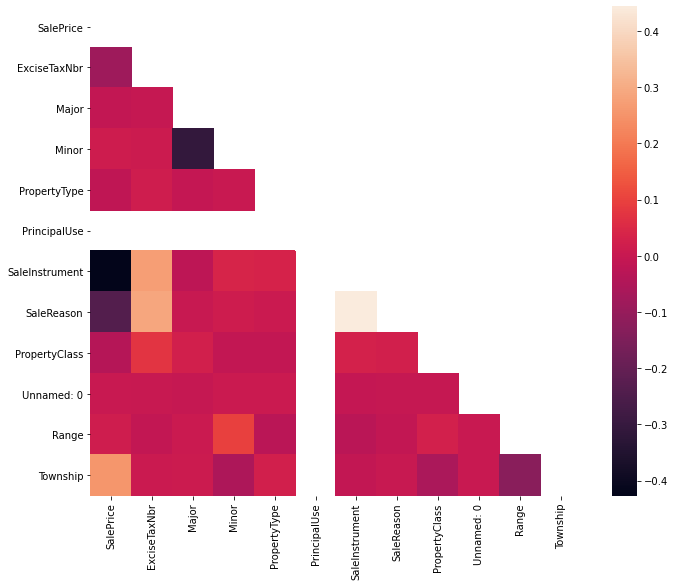

In [35]:
mask = np.triu(np.ones_like(corr_30, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11,9))
sns.heatmap(corr_30, mask=mask, ax=ax1);

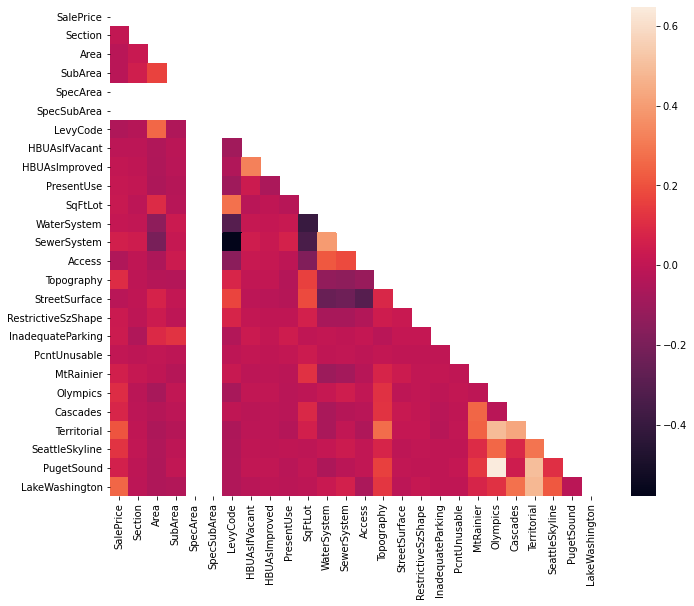

In [36]:
mask = np.triu(np.ones_like(corr_60, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11,9))
sns.heatmap(corr_60, mask=mask, ax=ax1);

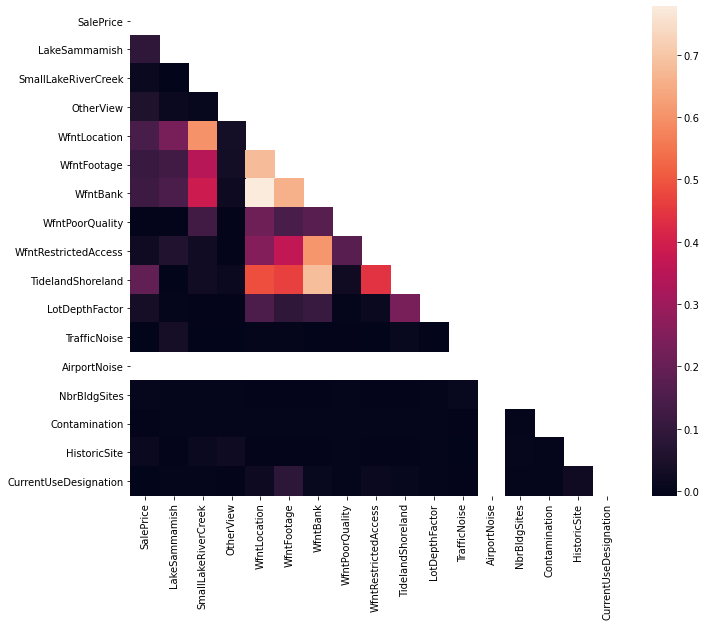

In [37]:
mask = np.triu(np.ones_like(corr_90, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11,9))
sns.heatmap(corr_90, mask=mask, ax=ax1);

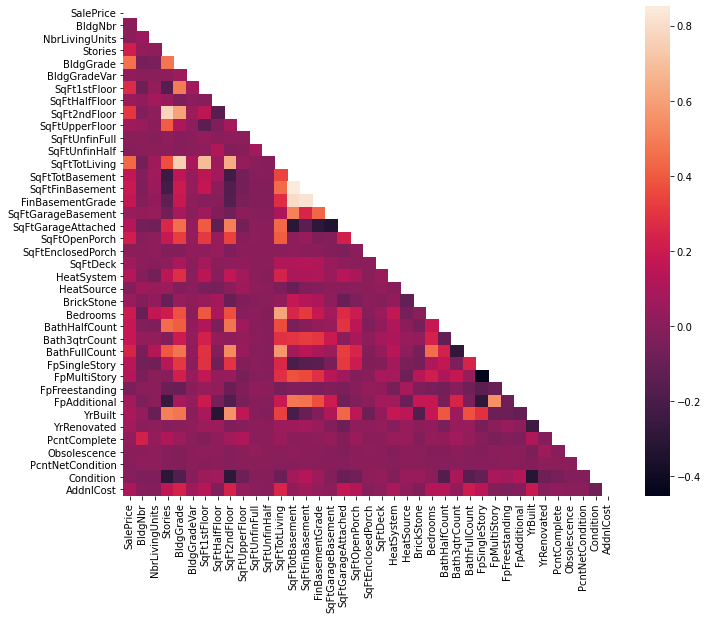

In [38]:
mask = np.triu(np.ones_like(corr_end, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11,9))
sns.heatmap(corr_end, mask=mask, ax=ax1);

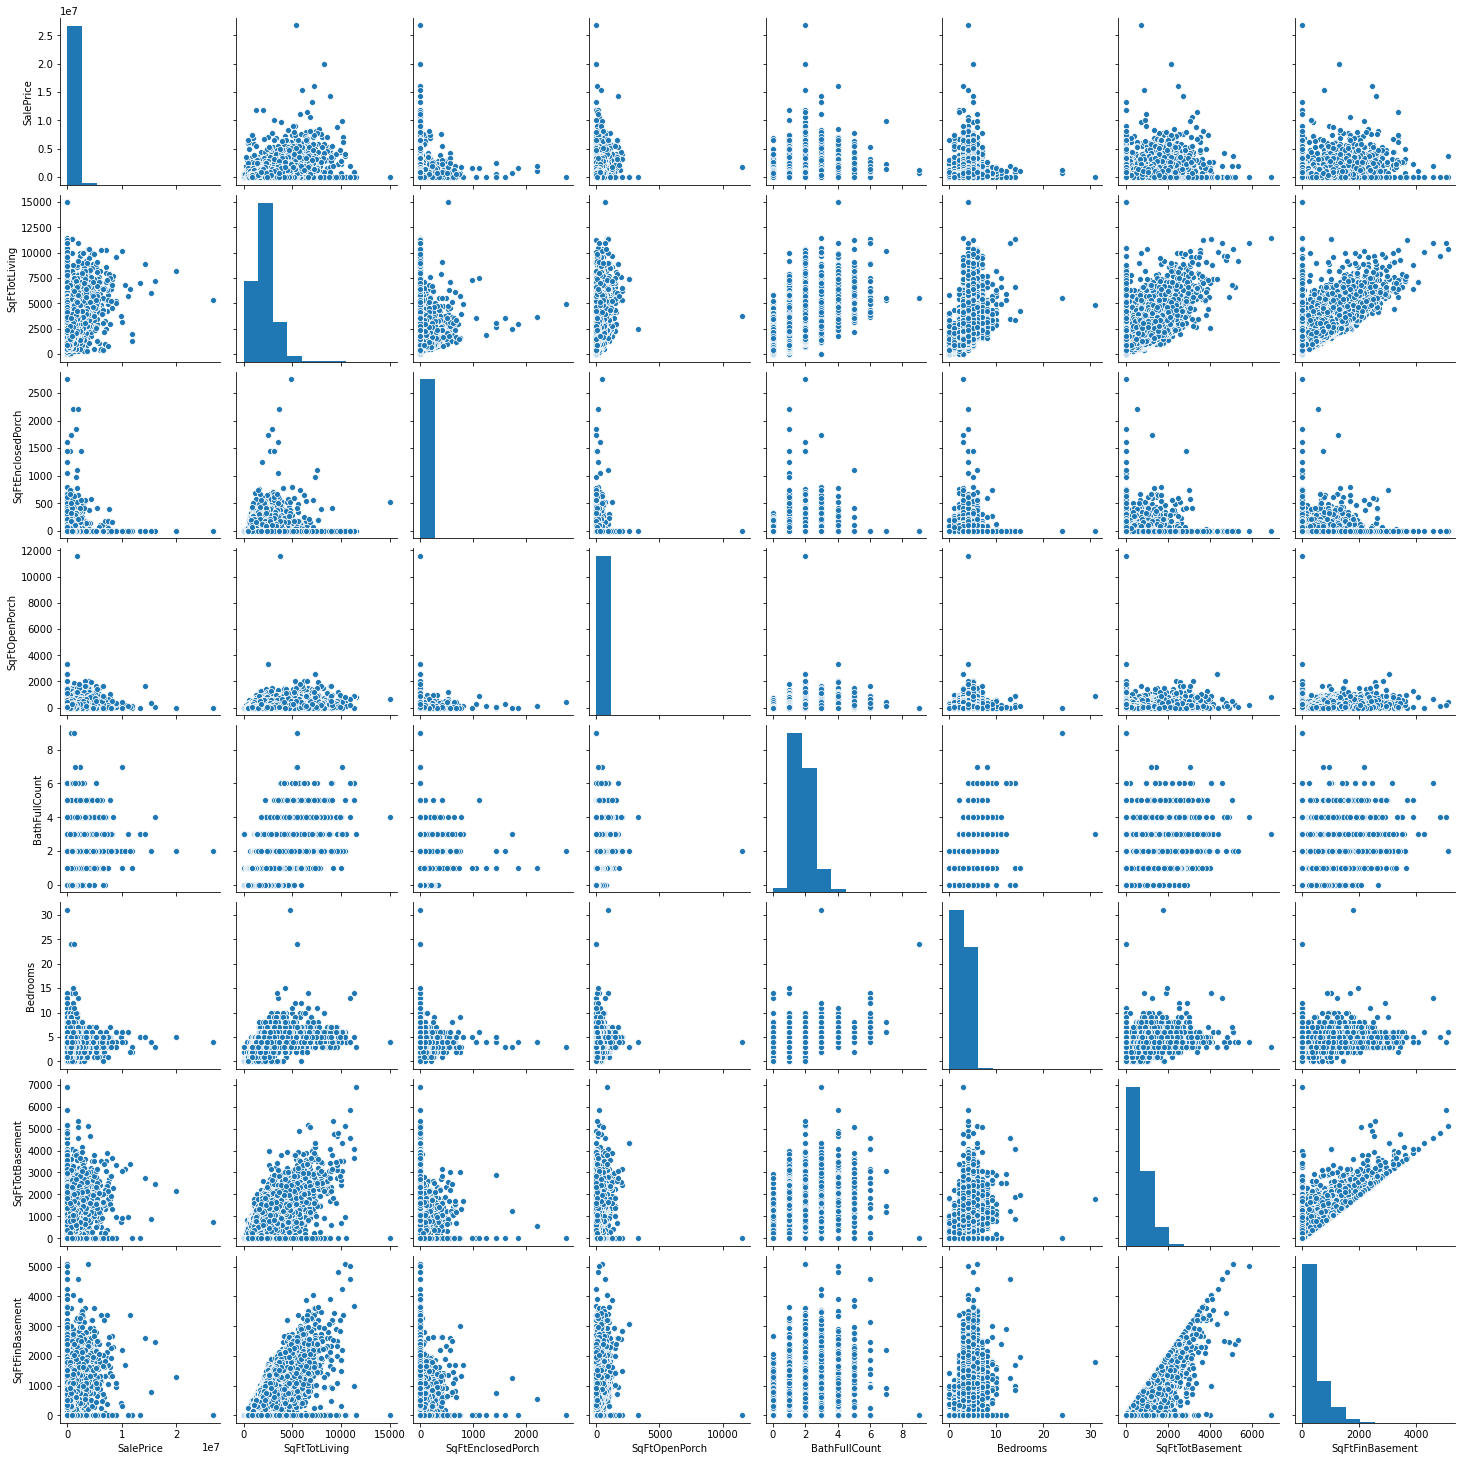

In [39]:
positively_correlated_cols = ['SalePrice', 'SqFtTotLiving', 'SqFtEnclosedPorch', 'SqFtOpenPorch', 'BathFullCount', 'Bedrooms', 'SqFtTotBasement', 'SqFtFinBasement']
positively_correlated_df = sale_bldg[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

In [40]:
fsm_df = sale_bldg[["SqFtTotLiving", "SalePrice"]].copy()
fsm_df.dropna(inplace=True)

In [102]:
fsm_dm =fsm_df[fsm_df.SalePrice>25000]

In [101]:
fsm_dm[fsm_dm.SalePrice<25000]

,SqFtTotLiving,SalePrice
21914,1370,15000
26292,2100,15000
48348,2020,19078
54501,3000,17435
63980,1700,15000
64117,2350,20000
64118,2350,20000
67437,1480,16000
80418,2460,18150
89154,580,13427


In [41]:
fsm = ols(formula="SalePrice ~ SqFtTotLiving", data=fsm_df)
fsm_results = fsm.fit()

In [42]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                 2.196e+04
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:12:47   Log-Likelihood:            -1.3057e+06
No. Observations:               89550   AIC:                         2.611e+06
Df Residuals:                   89548   BIC:                         2.611e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.644e+04   4128.570      6.403      0.000    1.83e+04    3.45e+04
SqFtTotLiving   260.8758      1.760    148.187      0.000     257.425     264.326
==============================================================================
Omnibus:                    95776.079   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         55687352.930
Skew:                           4.676   Prob(JB):                         0.00
Kurtosis:                     124.808   Cond. No.                     5.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.1243188526688264
Rainbow p-value: 1.4139600189292814e-35


In [103]:
fsm_update = ols(formula="SalePrice ~ SqFtTotLiving", data=fsm_dm)
fsm_results_update = fsm_update.fit()

In [104]:
fsm_results_update.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                 3.749e+04
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:47:24   Log-Likelihood:            -1.0139e+06
No. Observations:               70238   AIC:                         2.028e+06
Df Residuals:                   70236   BIC:                         2.028e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.519e+04   4069.442      6.191      0.000    1.72e+04    3.32e+04
SqFtTotLiving   336.0999      1.736    193.627      0.000     332.698     339.502
==============================================================================
Omnibus:                   102378.810   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        177784429.785
Skew:                           8.220   Prob(JB):                         0.00
Kurtosis:                     248.922   Cond. No.                     5.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results_update)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.228414570235119
Rainbow p-value: 5.9262883923473395e-83


In [46]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, sale_bldg[["SqFtTotLiving"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


In [47]:
sale_bldg

,SalePrice,ExciseTaxNbr,Major,Minor,DocumentDate,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
11,560000,3027422,213043,120,12/20/2019,20191226000848,,,,,...,0,0,0,1989,0,0,0,0,3,0
12,435000,3002257,940652,630,07/22/2019,20190730001339,,,,,...,1,0,0,1994,0,0,0,0,3,2500
17,400000,2859159,221250,90,04/12/2017,20170418000436,,,,,...,1,1,0,1965,0,0,0,0,4,0
19,520000,3038875,766370,622,03/12/2020,20200317000768,,,,,...,0,0,0,1952,0,0,0,0,3,5000
20,0,3041797,766370,622,03/27/2020,20200406001181,,,,,...,0,0,0,1952,0,0,0,0,3,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251289,6500000,2986698,33310,255,04/30/2019,20190508000847,,,,,...,1,0,0,1903,2012,0,0,0,3,0
251290,0,2949086,359700,405,07/31/2018,20180824000032,,,,,...,0,1,0,1918,0,0,0,0,3,0
251294,440000,2850555,112304,9161,02/21/2017,20170227001542,,,,,...,0,0,0,1996,0,0,0,0,3,0
251295,0,2997920,302300,320,05/01/2019,20190705000539,,,,,...,0,0,0,2011,0,0,0,0,3,6000


In [127]:
features = sale_bldg.filter(['SalePrice', 'SqFtTotLiving', 'BathFullCount', 'Bedrooms', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtTotBasement', 'SqFtFinBasement', 'HeatSource'], axis=1)

In [164]:
features.head()

,SalePrice,SqFtTotLiving,BathFullCount,Bedrooms,SqFtOpenPorch,SqFtEnclosedPorch,SqFtTotBasement,SqFtFinBasement,HeatSource
11,560000,1930,2,3,180,0,0,0,2
12,435000,1975,1,3,45,0,0,0,2
17,400000,3180,1,6,50,0,1590,1590,2
19,520000,1380,1,3,0,0,0,0,1
20,0,1380,1,3,0,0,0,0,1


In [129]:
features.describe()

,SalePrice,SqFtTotLiving,BathFullCount,Bedrooms,SqFtOpenPorch,SqFtEnclosedPorch,SqFtTotBasement,SqFtFinBasement,HeatSource
count,8.955000e+04,89550.000000,89550.000000,89550.000000,89550.000000,89550.000000,89550.000000,89550.000000,89550.000000
mean,5.814511e+05,2127.504802,1.567493,3.418559,70.707058,5.797722,497.034417,313.448386,2.096337
std,5.800518e+05,986.714374,0.709024,0.977151,129.029231,39.024293,593.794219,465.119118,0.589166
min,-2.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.775000e+05,1431.250000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.100000e+05,1940.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.800000e+05,2610.000000,2.000000,4.000000,90.000000,0.000000,980.000000,600.000000,2.000000
max,2.675000e+07,14980.000000,9.000000,31.000000,11570.000000,2750.000000,6910.000000,5110.000000,7.000000


In [223]:
sp_over_25k = features[features.SalePrice>25000]

In [224]:
corr_features = sp_over_25k.corr()

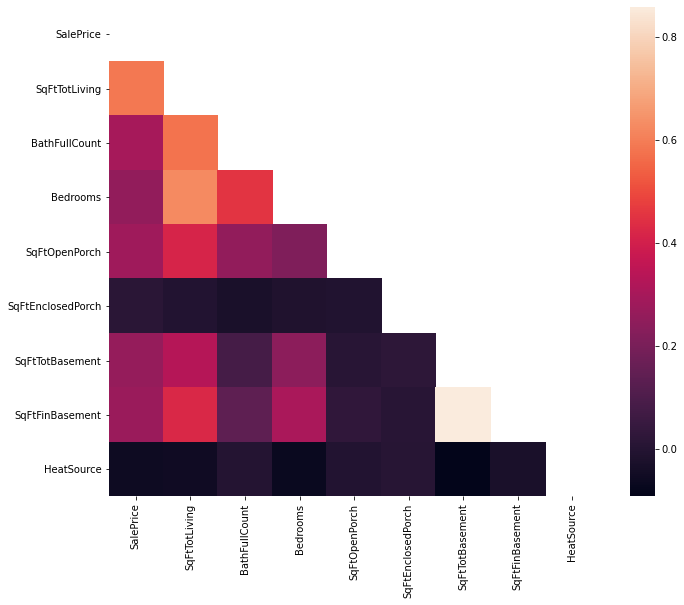

In [225]:
mask = np.triu(np.ones_like(corr_features, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11,9))
sns.heatmap(corr_features, mask=mask, ax=ax1);

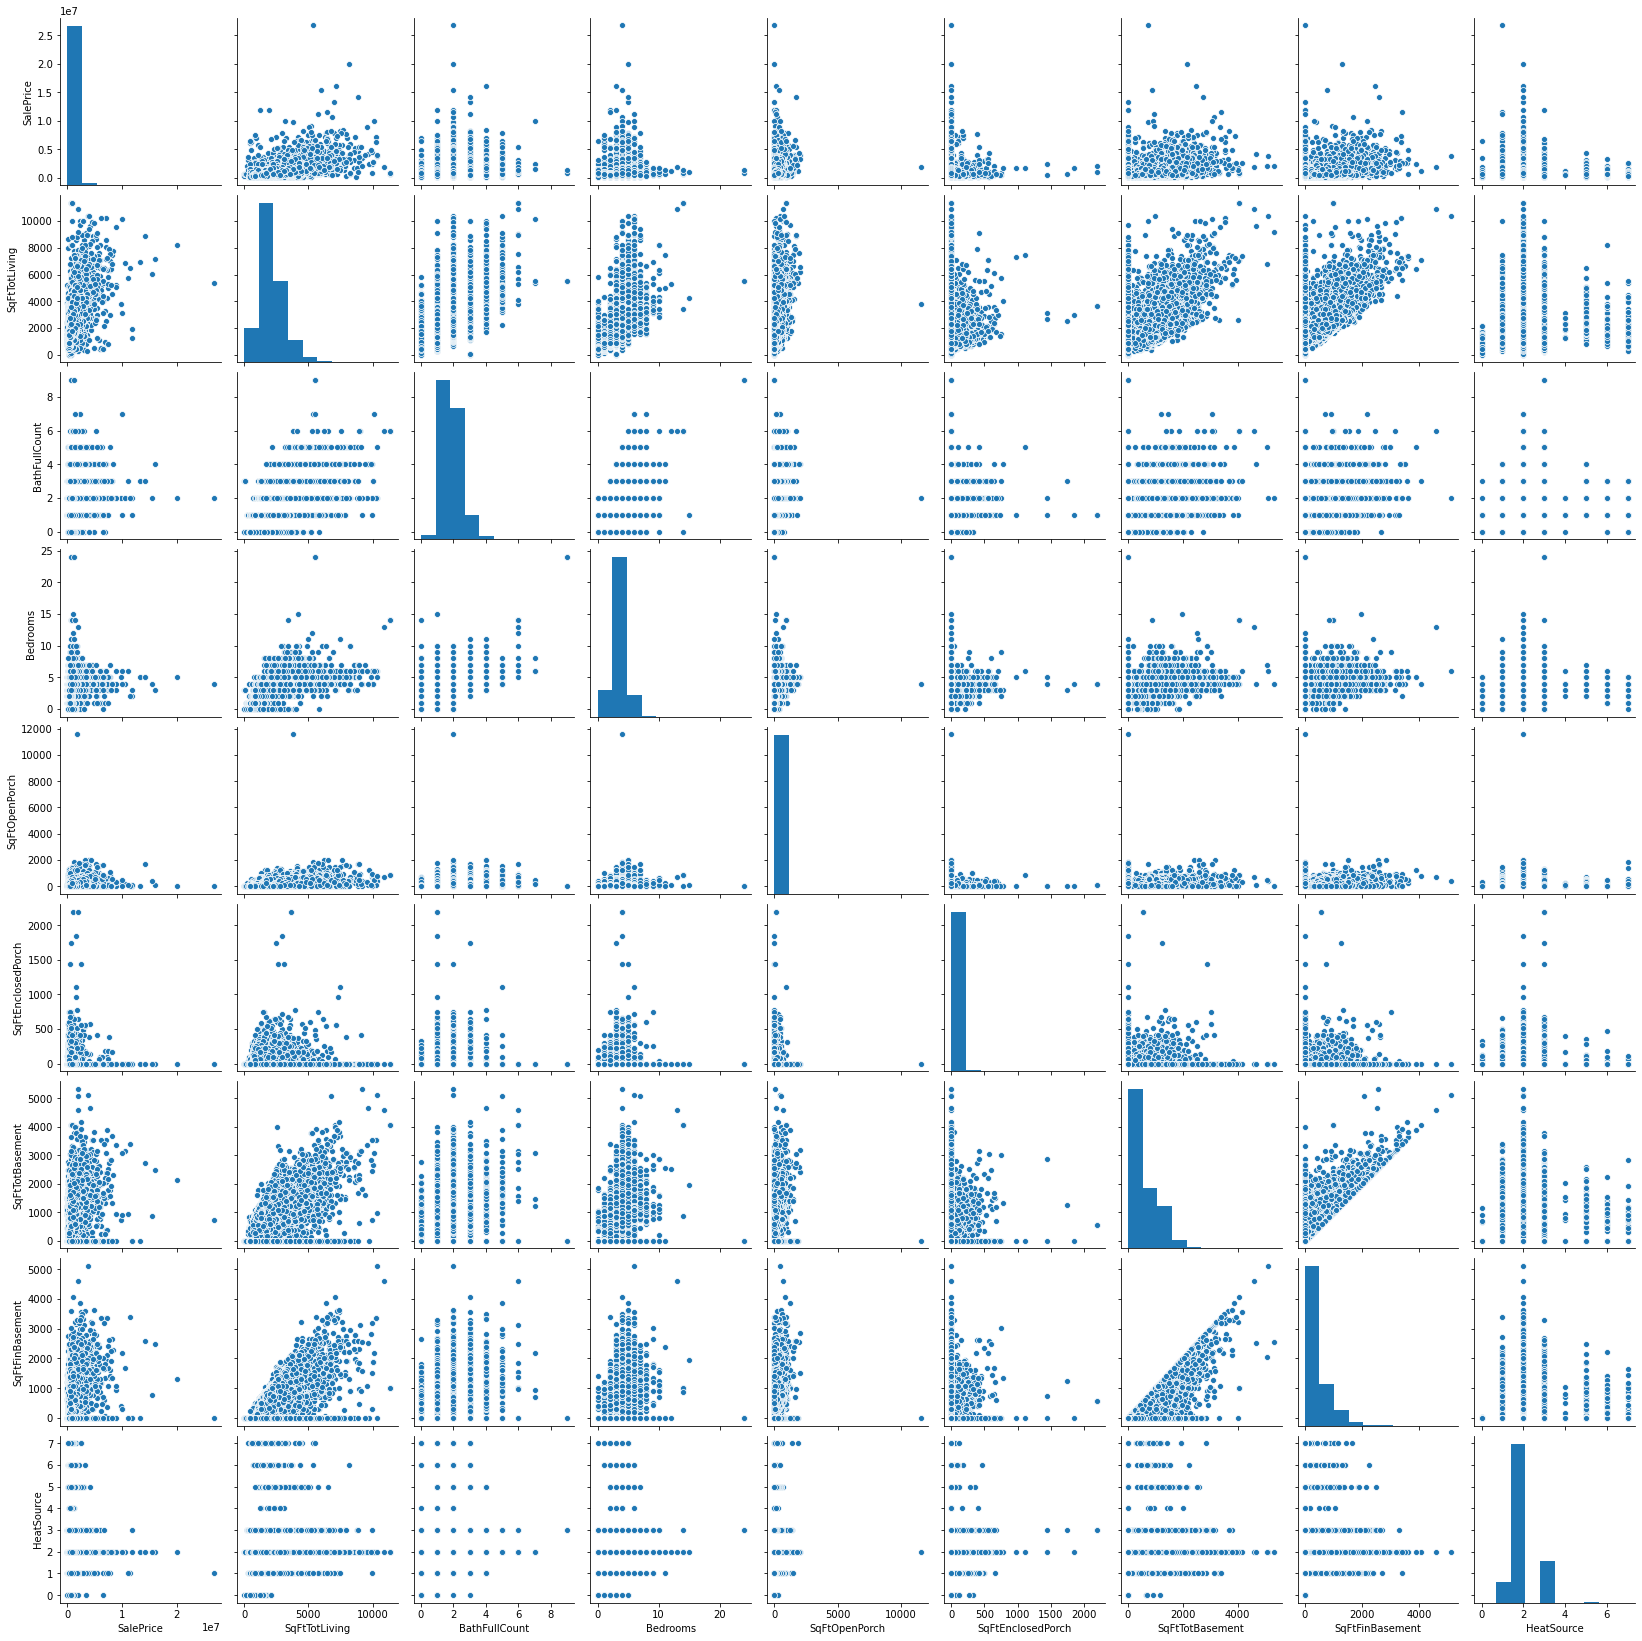

In [226]:
sns.pairplot(sp_over_25k);

In [54]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, features[["SalePrice"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


In [227]:
model_2 = sp_over_25k[["SalePrice", "SqFtTotLiving", "Bedrooms"]].copy()
model_2.dropna(inplace=True)

In [213]:
model_2 = ols(formula="SalePrice ~ SqFtTotLiving + Bedrooms", data=model_2)
model_2_results = model_2.fit()

In [214]:
model_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                 2.067e+04
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:49:01   Log-Likelihood:            -1.0127e+06
No. Observations:               70238   AIC:                         2.025e+06
Df Residuals:                   70235   BIC:                         2.025e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.615e+05   6180.209     42.311      0.000    2.49e+05    2.74e+05
SqFtTotLiving   405.0554      2.191    184.881      0.000     400.761     409.350
Bedrooms      -1.118e+05   2230.364    -50.143      0.000   -1.16e+05   -1.07e+05
==============================================================================
Omnibus:                   102469.475   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        186045853.293
Skew:                           8.218   Prob(JB):                         0.00
Kurtosis:                     254.597   Cond. No.                     9.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model_2_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.2280807698983076
Rainbow p-value: 9.702060657242782e-83


Model 3

In [228]:
model_3 = sp_over_25k[["SalePrice", "SqFtTotLiving", "SqFtTotBasement"]].copy()
model_3.dropna(inplace=True)

In [125]:
model_3 = ols(formula="SalePrice ~ SqFtTotLiving + SqFtTotBasement", data=model_3)
model_3_results = model_3.fit()

In [126]:
model_3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                 1.914e+04
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:06:37   Log-Likelihood:            -1.0137e+06
No. Observations:               70238   AIC:                         2.027e+06
Df Residuals:                   70235   BIC:                         2.027e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.094e+04   4058.861      5.160      0.000     1.3e+04    2.89e+04
SqFtTotLiving     322.2328      1.834    175.723      0.000     318.639     325.827
SqFtTotBasement    70.0906      3.081     22.748      0.000      64.052      76.130
==============================================================================
Omnibus:                   102661.959   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        182911237.529
Skew:                           8.259   Prob(JB):                         0.00
Kurtosis:                     252.454   Cond. No.                     5.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model_3_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.2277336438036368
Rainbow p-value: 1.6142843099059482e-82


In [229]:
rows_model_3 = sp_over_25k[["SqFtTotLiving", "SqFtTotBasement"]].values

vif_df_3 = pd.DataFrame()
vif_df_3["VIF"] = [variance_inflation_factor(rows_model_3, i) for i in range(2)]
vif_df_3["feature"] = ["SqFtTotLiving", "SqFtTotBasement"]

vif_df_3

,VIF,feature
0,1.891653,SqFtTotLiving
1,1.891653,SqFtTotBasement


Model 4

In [230]:
model_4 = sp_over_25k[["SalePrice", "SqFtTotLiving", "BathFullCount"]].copy()
model_4.dropna(inplace=True)

In [122]:
model_4 = ols(formula="SalePrice ~ SqFtTotLiving + BathFullCount", data=model_4)
model_4_results = model_4.fit()

In [123]:
model_4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                 1.897e+04
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:05:04   Log-Likelihood:            -1.0138e+06
No. Observations:               70238   AIC:                         2.028e+06
Df Residuals:                   70235   BIC:                         2.028e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       5.96e+04   4535.381     13.141      0.000    5.07e+04    6.85e+04
SqFtTotLiving   357.0033      2.123    168.188      0.000     352.843     361.164
BathFullCount -4.996e+04   2931.709    -17.040      0.000   -5.57e+04   -4.42e+04
==============================================================================
Omnibus:                   102181.369   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        176907885.460
Skew:                           8.188   Prob(JB):                         0.00
Kurtosis:                     248.317   Cond. No.                     6.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [231]:
rows = sp_over_25k[["SqFtTotLiving", "BathFullCount"]].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(2)]
vif_df["feature"] = ["SqFtTotLiving", "BathFullCount"]

vif_df

,VIF,feature
0,7.200119,SqFtTotLiving
1,7.200119,BathFullCount


Model 2 had the highest R-squared

In [232]:
heat_source = sp_over_25k[(sp_over_25k.HeatSource==2)|(sp_over_25k.HeatSource==6)]

In [193]:
heat_source = heat_source[heat_source.SalePrice<5000000]

In [192]:
heat_source[heat_source.SalePrice>5000000]

,SalePrice,SqFtTotLiving,BathFullCount,Bedrooms,SqFtOpenPorch,SqFtEnclosedPorch,SqFtTotBasement,SqFtFinBasement,HeatSource
1101,7750000,6360,3,4,830,0,1790,1620,2
2950,5498800,5430,2,5,510,0,0,0,2
6600,5235000,5150,2,4,220,0,1760,1760,2
6643,7800000,6990,3,5,1060,0,2830,1330,2
9420,5100000,5290,3,3,220,0,1540,1540,2
...,...,...,...,...,...,...,...,...,...
242348,5200000,4870,1,3,0,0,1600,1600,2
246473,6800000,6480,3,5,810,0,3390,3200,2
248418,8007375,5190,2,3,0,0,2840,2250,2
250805,5165000,5320,3,5,530,0,1580,1080,2


In [233]:
sp_over_25k

,SalePrice,SqFtTotLiving,BathFullCount,Bedrooms,SqFtOpenPorch,SqFtEnclosedPorch,SqFtTotBasement,SqFtFinBasement,HeatSource
11,560000,1930,2,3,180,0,0,0,2
12,435000,1975,1,3,45,0,0,0,2
17,400000,3180,1,6,50,0,1590,1590,2
19,520000,1380,1,3,0,0,0,0,1
21,425000,1990,2,3,280,0,0,0,2
...,...,...,...,...,...,...,...,...,...
251286,680000,2270,1,3,0,0,1520,750,1
251288,6500000,440,0,0,0,0,0,0,0
251289,6500000,6390,4,5,890,0,1670,1670,2
251294,440000,2780,3,4,0,0,1590,920,2


In [150]:
heat_source

,SalePrice,SqFtTotLiving,BathFullCount,Bedrooms,SqFtOpenPorch,SqFtEnclosedPorch,SqFtTotBasement,SqFtFinBasement,HeatSource
11,560000,1930,2,3,180,0,0,0,2
12,435000,1975,1,3,45,0,0,0,2
17,400000,3180,1,6,50,0,1590,1590,2
21,425000,1990,2,3,280,0,0,0,2
30,370000,1750,2,3,0,0,1130,460,2
...,...,...,...,...,...,...,...,...,...
251280,625000,2550,2,5,100,0,0,0,2
251284,980000,2660,1,6,40,0,1080,1080,2
251289,6500000,6390,4,5,890,0,1670,1670,2
251294,440000,2780,3,4,0,0,1590,920,2


In [151]:
heat_source.HeatSource.unique()

array([2, 6], dtype=int64)

In [196]:
model_2_df = heat_source[["SalePrice", "SqFtTotLiving", "Bedrooms", "HeatSource"]].copy()
model_2_df.dropna(inplace=True)

In [197]:
model_2_df["HeatSource"].value_counts()

2    50224
6       62
Name: HeatSource, dtype: int64

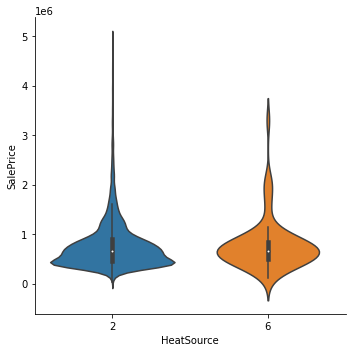

In [198]:
sns.catplot(x="HeatSource", y="SalePrice", data=model_2_df, kind="violin");

In [199]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model_2_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.2280807698983076
Rainbow p-value: 9.702060657242782e-83


In [216]:
y = model_2_df["SalePrice"]
y_hat = model_2_results.predict()

In [218]:
len(y_hat)

70238

In [219]:
len(y)

50286

In [207]:
y = y.to_numpy()

In [60]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    return model

ERROR! Session/line number was not unique in

In [136]:
fs_model = forward_selected(sp_under_25k, 'SalePrice')

In [137]:
fs_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     5431.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:25:54   Log-Likelihood:            -1.0120e+06
No. Observations:               70238   AIC:                         2.024e+06
Df Residuals:                   70229   BIC:                         2.024e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.977e+05   9254.476     32.171      0.000     2.8e+05    3.16e+05
SqFtTotLiving       395.3587      2.750    143.755      0.000     389.968     400.749
Bedrooms          -1.098e+05   2245.815    -48.895      0.000   -1.14e+05   -1.05e+05
SqFtTotBasement     159.9029      5.618     28.462      0.000     148.891     170.914
SqFtFinBasement    -129.0852      7.478    -17.262      0.000    -143.742    -114.428
SqFtOpenPorch       189.8515     14.338     13.241      0.000     161.749     217.954
BathFullCount     -2.029e+04   2930.579     -6.925      0.000    -2.6e+04   -1.46e+04
HeatSource        -2.006e+04   2933.511     -6.837      0.000   -2.58e+04   -1.43e+04
SqFtEnclosedPorch   191.6334     44.326      4.323      0.000     104.755     278.512
==============================================================================
Omnibus:                   102940.527   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        196380554.387
Skew:                           8.280   Prob(JB):                         0.00
Kurtosis:                     261.511   Cond. No.                     1.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""